In [30]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Load the dataset
df = pd.read_csv("../../data/raw/glassdoor_jobs.csv")

df.head()


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,...,27,0,0,0,0,1,0,0,data scientist,senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,...,52,0,0,1,0,0,0,1,data scientist,na
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,...,39,1,1,0,0,1,0,0,data scientist,na
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,...,20,1,1,0,0,1,0,0,data scientist,na
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,...,22,1,1,0,0,0,0,0,data scientist,na


In [32]:
cols_to_drop = ["Job Description", "Salary Estimate", "Headquarters", "Job Title", "Rating", "Company Name", "Location", "Industry", "Sector", "Revenue"]
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

df.columns


Index(['Size', 'Type of ownership', 'min_salary', 'max_salary', 'avg_salary',
       'job_state', 'same_state', 'company_age', 'python', 'excel', 'hadoop',
       'spark', 'aws', 'tableau', 'big_data', 'job_simp', 'seniority'],
      dtype='object')

In [33]:
df = df.replace(['na', 'NA', 'Na', 'n/a', 'N/A', 'NaN', 'nan'], pd.NA)

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.fillna(0)

print(df.dtypes.value_counts())


int64      12
float64     5
Name: count, dtype: int64


In [34]:
df['experience_years_proxy'] = df['seniority'].map({
    0: 1,   # junior ≈ 1 year
    1: 6    # senior ≈ 6 years
})



In [35]:
skill_cols = ['python', 'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data']

df['skill_count'] = df[skill_cols].sum(axis=1)


In [36]:
categorical_cols = [ "job_simp", "Size", "Type of ownership"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# after Encoding
df.head()


,min_salary,max_salary,avg_salary,job_state,same_state,company_age,python,excel,hadoop,spark,aws,tableau,big_data,seniority,experience_years_proxy,skill_count,Size_0.0,Type of ownership_0.0
0,137,171,154,0.0,1,27,0,0,0,0,1,0,0,0.0,1,1,True,True
1,137,171,154,0.0,0,52,0,0,1,0,0,0,1,0.0,1,2,True,True
2,137,171,154,0.0,1,39,1,1,0,0,1,0,0,0.0,1,3,True,True
3,137,171,154,0.0,0,20,1,1,0,0,1,0,0,0.0,1,3,True,True
4,137,171,154,0.0,1,22,1,1,0,0,0,0,0,0.0,1,2,True,True


In [37]:
df.dtypes

df.describe()


,min_salary,max_salary,avg_salary,job_state,same_state,company_age,python,excel,hadoop,spark,aws,tableau,big_data,seniority,experience_years_proxy,skill_count
count,660.000000,660.000000,660.000000,660.0,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.0,660.0,660.000000
mean,99.296970,148.301515,123.612121,0.0,0.407576,29.736364,0.730303,0.440909,0.212121,0.281818,0.260606,0.184848,0.206061,0.0,1.0,2.316667
std,33.161485,48.264588,39.786698,0.0,0.491756,39.763033,0.444139,0.496873,0.409120,0.450226,0.439298,0.388469,0.404781,0.0,0.0,1.548810
min,31.000000,56.000000,43.000000,0.0,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000
25%,79.000000,119.000000,103.000000,0.0,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.000000
50%,91.000000,133.000000,114.000000,0.0,0.000000,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,2.000000
75%,122.000000,165.000000,136.000000,0.0,1.000000,37.250000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,1.0,3.000000
max,212.000000,331.000000,271.000000,0.0,1.000000,239.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,7.000000


In [38]:
# save
df.to_csv("../../data/processed/processed_jobs.csv", index=False)
print("Data preprocessing completed and saved as 'processed_jobs.csv'")


Data preprocessing completed and saved as 'processed_jobs.csv'


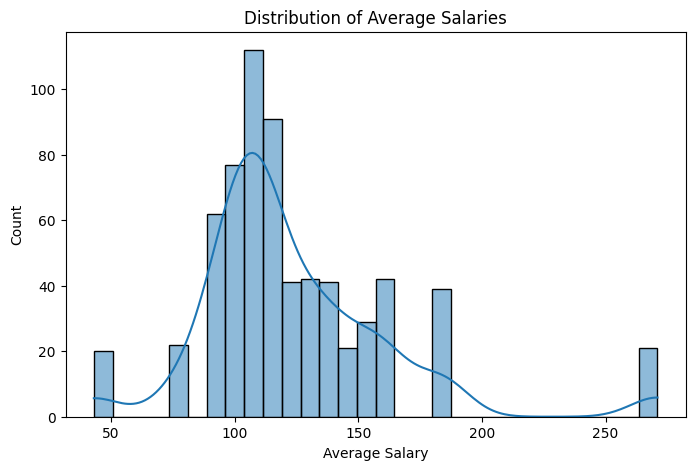

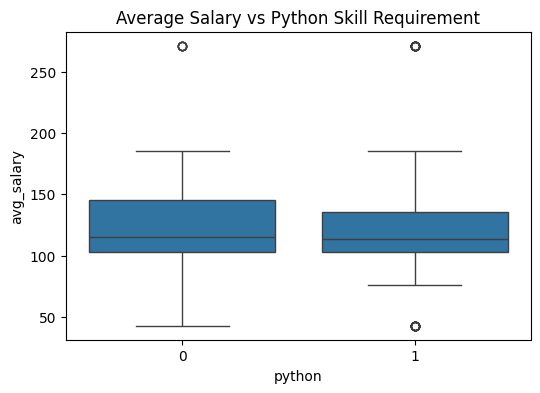

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(df['avg_salary'], bins=30, kde=True)
plt.title("Distribution of Average Salaries")
plt.xlabel("Average Salary")
plt.ylabel("Count")
plt.show()
###
plt.figure(figsize=(6,4))
sns.boxplot(x=df['python'], y=df['avg_salary'])
plt.title("Average Salary vs Python Skill Requirement")
plt.show()


In [40]:
print(df.columns.tolist())


['min_salary', 'max_salary', 'avg_salary', 'job_state', 'same_state', 'company_age', 'python', 'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data', 'seniority', 'experience_years_proxy', 'skill_count', 'Size_0.0', 'Type of ownership_0.0']
